In [229]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
%matplotlib inline

# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()


In [230]:
df_final = pd.read_csv('../final_dataset.csv')


In [231]:

obj1_parking_filter = df_final.loc[: ,'carpark_night_parking'] == 'YES'

df_final = df_final[(df_final['Flat Type'] == '3 ROOM') | (df_final['Flat Type'] == '4 ROOM') | (df_final['Flat Type'] == '5 ROOM') |(df_final['Flat Type'] == 'EXECUTIVE')|(df_final['Flat Type'] == 'MULTI-GENERATION')][(df_final['Town'] == 'QUEENSTOWN') | (df_final['Town'] == 'BUKIT MERAH')][obj1_parking_filter]

# df_final[obj1_house_filter][obj1_parking_filter][obj1_town_filter]
df_final

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Block,Full Address,Flat Model,Flat Type,Floor Area (sqm),Lease Commencement Date,Month of Resale,Resale Price,Storey Range,Street Name,...,carpark_height,carpark_night_parking,carpark_free_parking,carpark_system,house_to_carpark,house_to_mrt,avg_per_sqm,resale_year,lease_Commencement_year,remaining_lease_year
30,86,86 REDHILL CL,Improved,3 ROOM,59.0,"Mon,01 Jan 73","Wed,01 Mar 17",310000.0,16 TO 18,REDHILL CL,...,1.90,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.059069,0.456188,5254.24,2017,1973,51
31,128,128 BT MERAH VIEW,Improved,3 ROOM,76.0,"Mon,01 Jan 73","Wed,01 Mar 17",430000.0,16 TO 18,BT MERAH VIEW,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.098180,0.718371,5657.89,2017,1973,51
32,130,130 BT MERAH VIEW,Improved,3 ROOM,65.0,"Mon,01 Jan 73","Sat,01 Apr 17",383000.0,16 TO 18,BT MERAH VIEW,...,1.90,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.112562,0.412171,5892.31,2017,1973,51
33,129,129 BT MERAH VIEW,Improved,3 ROOM,65.0,"Mon,01 Jan 73","Fri,01 Dec 17",365000.0,16 TO 18,BT MERAH VIEW,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.003070,0.620981,5615.38,2017,1973,51
34,128,128 BT MERAH VIEW,Improved,3 ROOM,76.0,"Mon,01 Jan 73","Sun,01 Jul 18",378000.0,16 TO 18,BT MERAH VIEW,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.098180,0.718371,4973.68,2018,1973,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133182,26B,26B JLN MEMBINA,Model A,4 ROOM,85.0,"Thu,01 Jan 09","Wed,01 Apr 15",640000.0,01 TO 03,JLN MEMBINA,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.055570,0.469821,7529.41,2015,2009,77
133183,26C,26C JLN MEMBINA,Model A,4 ROOM,85.0,"Thu,01 Jan 09","Wed,01 Apr 15",600000.0,01 TO 03,JLN MEMBINA,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.052485,0.540905,7058.82,2015,2009,77
133184,57,57 HAVELOCK RD,Model A,4 ROOM,94.0,"Tue,01 Jan 13","Thu,01 Jun 17",700000.0,01 TO 03,HAVELOCK RD,...,2.15,YES,SUN & PH FR 7AM-10.30PM,ELECTRONIC PARKING,0.094471,0.563815,7446.81,2017,2013,78
133185,127D,127D KIM TIAN RD,Model A,4 ROOM,88.0,"Tue,01 Jan 13","Sun,01 Oct 17",690000.0,01 TO 03,KIM TIAN RD,...,2.15,YES,NO,ELECTRONIC PARKING,0.143276,0.820030,7840.91,2017,2013,78


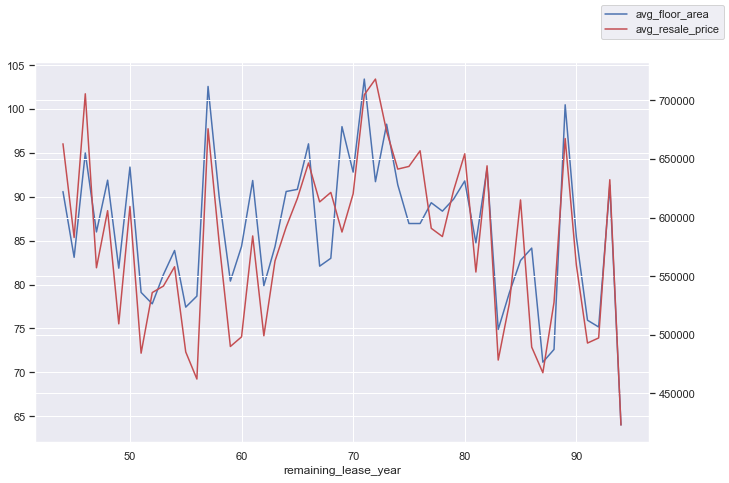

In [232]:
d = []

remaining_lease_year_list = df_final.remaining_lease_year.unique()

for year in remaining_lease_year_list:
    d.append({"remaining_lease_year":year,
              "avg_floor_area": round(df_final[df_final['remaining_lease_year'] == year]['Floor Area (sqm)'].mean(),2),
              'avg_resale_price':round(df_final[df_final['remaining_lease_year'] == year]['Resale Price'].mean(),2)
              })

df_avg_floor_area_vs_resale_price = pd.DataFrame(data=d).sort_values(by=['remaining_lease_year'])


#
# lineplot = sns.lineplot(data=pd.melt(df_avg_floor_area_vs_resale_price,'remaining_lease_year'), x="remaining_lease_year", y="value", hue='variable')
# lineplot.set_xlabel('Remaining Lease Year')
# lineplot.set_ylabel('Average Resale Price(SGD)')
# plt.title('Remaining Lease Year vs Avg Resale Price', fontsize=20)

ax = df_avg_floor_area_vs_resale_price.plot(x="remaining_lease_year", y="avg_floor_area", legend=False, figsize=(11,7))
ax2 = ax.twinx()
df_avg_floor_area_vs_resale_price.plot(x="remaining_lease_year", y="avg_resale_price", ax=ax2, legend=False, color="r",)
ax.figure.legend()
plt.show()

fig = ax.get_figure()
fig.suptitle("Remaining Lease Year vs Avg Resale Price", fontsize=20)
fig.savefig('Floor Area VS Remaining Lease.jpg')


In [233]:
d = []

year_span = df_final.resale_year.unique()
year_span = np.sort(year_span)

Town_list = df_final.Town.unique()
# get the average price per sqm by room types
room_types = np.sort(df_final['Flat Type'].unique())
avg_by_room = [round(df_final[df_final['Flat Type'] == i].avg_per_sqm.mean(),2) for i in room_types]

# get the average price per sqm by room types and year
for t in Town_list:
    for y in year_span:
        means_calc = round(df_final[df_final['Town'] == t][df_final['resale_year'] == y].avg_per_sqm.mean(),2)
        new_line = {'year': y, 'town': t,'avg': means_calc}
        d.append(new_line)

df_avg_vs_year = pd.DataFrame(data=d)
df_avg_vs_year



C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning:

Boolean Series key will be reindexed to ma

,year,town,avg
0,2012,BUKIT MERAH,6428.43
1,2013,BUKIT MERAH,6849.32
2,2014,BUKIT MERAH,6488.12
3,2015,BUKIT MERAH,6458.49
4,2016,BUKIT MERAH,6458.46
5,2017,BUKIT MERAH,6588.09
6,2018,BUKIT MERAH,6516.99
7,2019,BUKIT MERAH,6448.82
8,2012,QUEENSTOWN,6847.56
9,2013,QUEENSTOWN,7092.45


In [234]:

df = px.data.stocks()
fig = px.line(df_avg_vs_year, x="year", y='avg',
              hover_data=['town'], color='town',
              title='Average Price By Year and Town', width=800, height=700)
fig.update_yaxes(title_text="<b>Average Price per sqm(S$)</b>")
fig.update_layout(legend=dict(
    yanchor="top",
    y=1.23,
    xanchor="right",
    x=0.93,
), width=800, height=600)

fig.show()

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\stx6\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning:

invalid value encountered in double_scalars



[{'station_no': 'EW18', 'resale_year': 2017, 'avg_per_sqm': 6650.59}, {'station_no': 'EW18', 'resale_year': 2018, 'avg_per_sqm': 6722.33}, {'station_no': 'EW18', 'resale_year': 2019, 'avg_per_sqm': 6445.95}, {'station_no': 'EW18', 'resale_year': 2014, 'avg_per_sqm': 6687.22}, {'station_no': 'EW18', 'resale_year': 2015, 'avg_per_sqm': 6674.78}, {'station_no': 'EW18', 'resale_year': 2012, 'avg_per_sqm': 6534.39}, {'station_no': 'EW18', 'resale_year': 2013, 'avg_per_sqm': 7017.54}, {'station_no': 'EW18', 'resale_year': 2016, 'avg_per_sqm': 6535.22}, {'station_no': 'EW17', 'resale_year': 2017, 'avg_per_sqm': 7299.13}, {'station_no': 'EW17', 'resale_year': 2018, 'avg_per_sqm': 7217.78}, {'station_no': 'EW17', 'resale_year': 2019, 'avg_per_sqm': 7231.81}, {'station_no': 'EW17', 'resale_year': 2014, 'avg_per_sqm': 7033.29}, {'station_no': 'EW17', 'resale_year': 2015, 'avg_per_sqm': 7083.65}, {'station_no': 'EW17', 'resale_year': 2012, 'avg_per_sqm': 7102.74}, {'station_no': 'EW17', 'resale_ye

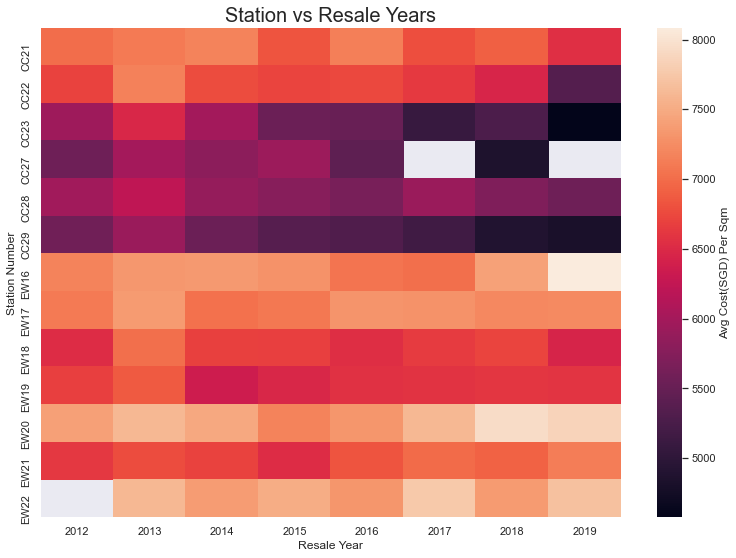

In [235]:
sns.set_theme()

df_final_1 = df_final
# Load the example flights dataset and convert to long-form
hmap_data = df_final_1.loc[:,['mrt_stn_no','resale_year','Resale Price','Floor Area (sqm)']]
hmap_data = hmap_data.reset_index(drop=True)

station_no = hmap_data['mrt_stn_no'].unique()
resale_year = hmap_data['resale_year'].unique()
station_resale_price_hmap_data = []
for s in station_no:
    for y in resale_year:
        floor_area = hmap_data[(hmap_data.mrt_stn_no == s) & (hmap_data.resale_year == y)]['Floor Area (sqm)'].sum()
        sum = hmap_data[(hmap_data.mrt_stn_no == s) & (hmap_data.resale_year == y)]['Resale Price'].sum()
        avg = round(sum/floor_area,2)
        station_resale_price_hmap_data.append({
            'station_no': s,
            'resale_year':y,
            'avg_per_sqm': avg
        })
print(station_resale_price_hmap_data)
station_resale_price_hmap_data = pd.DataFrame(station_resale_price_hmap_data)
station_resale_price_hmap_data = station_resale_price_hmap_data


station_resale_price_hmap_data = station_resale_price_hmap_data.pivot('station_no','resale_year','avg_per_sqm')
# # Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(13,9))
sns.heatmap(station_resale_price_hmap_data, ax=ax, cbar_kws={'label': 'Avg Cost(SGD) Per Sqm'})
plt.xlabel("Resale Year")
plt.ylabel("Station Number")
plt.title('Station vs Resale Years', fontsize=20)
f.savefig('station_resale_price_heatmap.jpg')

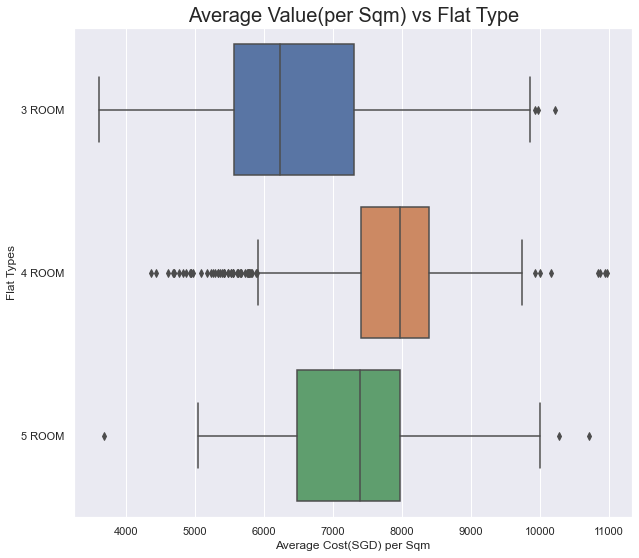

In [236]:
df_final = df_final_1[(df_final_1['mrt_stn_no']=='EW21') | (df_final_1['mrt_stn_no']=='EW22') | (df_final_1['mrt_stn_no']=='EW20') | (df_final_1['mrt_stn_no']=='EW16') | (df_final_1['mrt_stn_no']=='EW17')]

# sns.set_theme(style="whitegrid")
# f, ax = plt.subplots(figsize=(10,10))
# sns.despine(f, left=True, bottom=True)
# sns.scatterplot(x="Flat Type", y="remaining_lease_year",
#                 hue="avg_per_sqm", size="house_to_carpark",
#                 palette="ch:r=-.2,d=.3_r",
#                 sizes=(1, 8), linewidth=0,
#                 data=df_final, ax=ax)
ax = plt.figure(figsize=(10,9))
ax = sns.boxplot(x="avg_per_sqm", y="Flat Type", data=df_final)
ax.set_xlabel('Average Cost(SGD) per Sqm')
ax.set_ylabel('Flat Types')
ax.set_title('Average Value(per Sqm) vs Flat Type', fontsize=20)
plt.savefig('Average Value(per Sqm) vs Flat Type- boxplot.jpg')


In [237]:
d = []

remaining_lease_year_list = df_final.remaining_lease_year.unique()

for year in remaining_lease_year_list:
    d.append({"remaining_lease_year":year,
              "avg_floor_area": round(df_final[df_final['remaining_lease_year'] == year]['Floor Area (sqm)'].mean(),2),
              'avg_resale_price':round(df_final[df_final['remaining_lease_year'] == year]['Resale Price'].mean(),2)
              })

df_avg_floor_area_vs_resale_price = pd.DataFrame(data=d).sort_values(by=['remaining_lease_year'])




from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=df_avg_floor_area_vs_resale_price.remaining_lease_year, y=df_avg_floor_area_vs_resale_price.avg_resale_price, name="Average <br>Resale Price"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_avg_floor_area_vs_resale_price.remaining_lease_year, y=df_avg_floor_area_vs_resale_price.avg_floor_area, name="Average <br>Floor Area"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Remaining Lease, Floor Area and Resale Value"
)

# Set x-axis title
fig.update_xaxes(title_text="Remaining Lease Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Average Resale Price</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Average Floor Area</b>", secondary_y=True)

fig.update_layout(legend=dict(
    yanchor="top",
    y=1.23,
    xanchor="right",
    x=0.93,
), width=800, height=600)

fig.show()


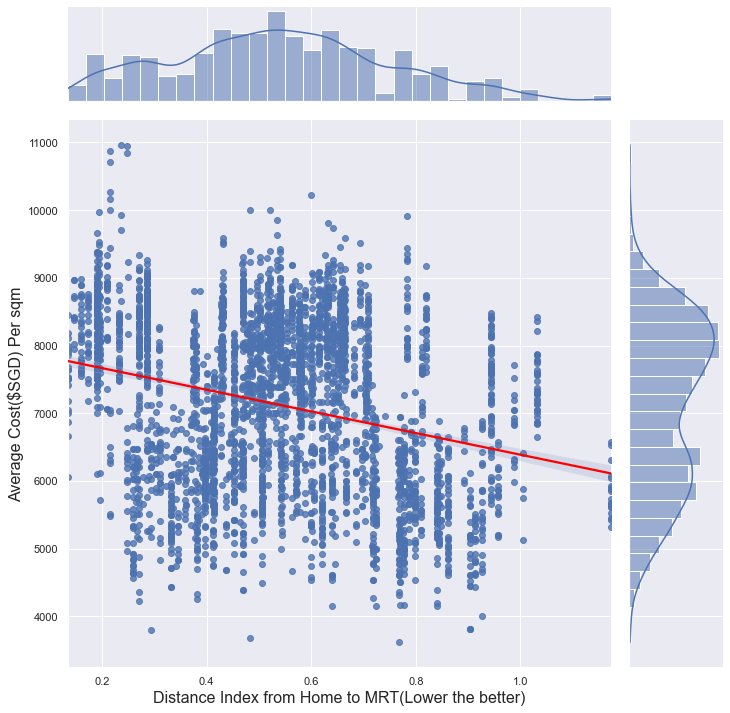

In [238]:

g = sns.jointplot(x="house_to_mrt", y='avg_per_sqm', data=df_final, kind='reg', height=10)
regline = g.ax_joint.get_lines()[0]
regline.set_color('red')
regline.set_zorder(5)
g.set_axis_labels('Distance Index from Home to MRT(Lower the better)', 'Average Cost($SGD) Per sqm', fontsize=16)
# g.fig.suptitle("Correlation between distance to mrt and resale value")
g.savefig('distance_to_mrt_VS_resale.jpg')

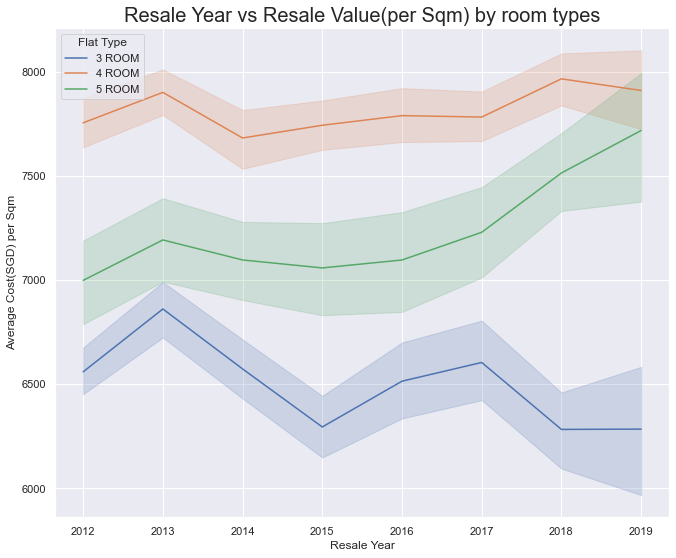

In [239]:
# line_chart_data = df_final.loc[:,['Town','resale_year','Resale Price','Floor Area (sqm)']]
fig = plt.figure(figsize=(11,9))
fig = sns.lineplot(data=df_final, x="resale_year", y="avg_per_sqm", hue='Flat Type')
fig.set_xlabel('Resale Year')
fig.set_ylabel('Average Cost(SGD) per Sqm')
fig.set_title('Resale Year vs Resale Value(per Sqm) by room types', fontsize = 20)
plt.savefig('Resale Year vs Value by room types.jpg')

In [240]:
df_final = df_final[df_final['Flat Type'] == '4 ROOM']




In [241]:
px.set_mapbox_access_token('pk.eyJ1IjoiYWxsYW54ZW5vbiIsImEiOiJja2d2bTh3aXgwMXJsMnNwZHd1bGJvamJnIn0.4mRclFhRxVwAdHq5jm-Kkw')
df = px.data.carshare()
fig = px.scatter_mapbox(df_final, lat="Latitudes", lon="Longitudes", color="avg_per_sqm", size="avg_per_sqm", hover_data=["mrt_name", "Floor Area (sqm)", 'mrt_color', 'Resale Price', 'Town','Flat Type','house_to_mrt','house_to_carpark','remaining_lease_year'],
                   color_continuous_scale=px.colors.sequential.Inferno, size_max=6, zoom=12, opacity=0.6,labels={'avg_per_sqm':'Average<br>Cost per<br>sqm(SGD)'})
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0}
                  ,title='HDBs and price per sqm', )
fig.show()
